In [23]:
import xgboost
from xgboost import XGBClassifier

from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# 数据加载

In [2]:
# load data
dataset = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
dataset.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
# split data into X and y
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

In [5]:
X.shape, Y.shape

((767, 8), (767,))

In [6]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((513, 8), (254, 8), (513,), (254,))

In [25]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.38%


In [26]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7677165354330708

In [16]:
model2 = XGBClassifier()
eval_set = [(X_test, y_test)]
model2.fit(X_train, y_train, early_stopping_rounds=10, 
          eval_metric="logloss", eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = model2.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.660861
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634972
[2]	validation_0-logloss:0.611351
[3]	validation_0-logloss:0.592642
[4]	validation_0-logloss:0.575132
[5]	validation_0-logloss:0.563485
[6]	validation_0-logloss:0.549664
[7]	validation_0-logloss:0.541282
[8]	validation_0-logloss:0.530643
[9]	validation_0-logloss:0.521952
[10]	validation_0-logloss:0.515799
[11]	validation_0-logloss:0.509574
[12]	validation_0-logloss:0.503468
[13]	validation_0-logloss:0.499532
[14]	validation_0-logloss:0.493536
[15]	validation_0-logloss:0.490027
[16]	validation_0-logloss:0.485746
[17]	validation_0-logloss:0.481438
[18]	validation_0-logloss:0.479345
[19]	validation_0-logloss:0.477251
[20]	validation_0-logloss:0.472621
[21]	validation_0-logloss:0.470315
[22]	validation_0-logloss:0.469204
[23]	validation_0-logloss:0.466885
[24]	validation_0-logloss:0.46358
[25]	validation_0-logloss:0.461839
[26]	validation_0-logloss:0.46010

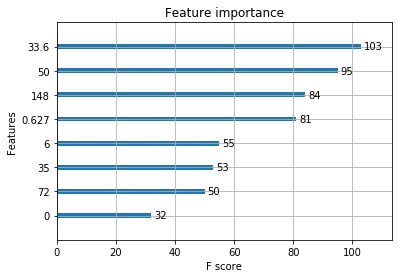

In [19]:
model3 = XGBClassifier()
model3.fit(X_train, y_train)
# plot feature importance
plot_importance(model3)
plt.show()

# 超参设置

1.learning rate

2.tree 

max_depth

min_child_weight

subsample, colsample_bytree

gamma 

3.正则化参数

lambda 

alpha 


In [4]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [22]:
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f  with: %r" % (mean, param))

Best: -0.481923 using {'learning_rate': 0.1}
-0.689707  with: {'learning_rate': 0.0001}
-0.660775  with: {'learning_rate': 0.001}
-0.527197  with: {'learning_rate': 0.01}
-0.481923  with: {'learning_rate': 0.1}
-0.513463  with: {'learning_rate': 0.2}
-0.563494  with: {'learning_rate': 0.3}
